In [1]:
import xarray as xr
from smmregrid import Regridder, cdo_generate_weights
import Util
import importlib
importlib.reload(Util)

<module 'Util' from '/work/users/ighirardo/plasim/exp/Util.py'>

In [2]:
# provare con bil e nn le griglie da 144x72 con comando weights su mafalda 
#guardare se lon e lat invece che essere 2.5 e poi +5 quindi 7.5 sono invece 1.25 e poi +3.75 

In [11]:
infile1="/home/ighirardo/work/plasim/exp/test_pla_lsg/test1_lsg/output/MOST_LSG.0600.nc"
data1 = Util.open_mfdataset_plasim_monthly(infile1, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)

In [12]:
data1

<xarray.Dataset>
Dimensions:  (time: 12, y: 76, x: 72, depth: 22, depth_2: 22, lev: 1,
              depth_3: 21)
Coordinates:
  * time     (time) object 0600-01-01 00:00:00 ... 0600-12-01 00:00:00
    lon      (y, x) float64 dask.array<chunksize=(76, 72), meta=np.ndarray>
    lat      (y, x) float64 dask.array<chunksize=(76, 72), meta=np.ndarray>
    lon_2    (y, x) float64 dask.array<chunksize=(76, 72), meta=np.ndarray>
    lat_2    (y, x) float64 dask.array<chunksize=(76, 72), meta=np.ndarray>
  * depth    (depth) float64 25.0 75.0 125.0 175.0 ... 3.5e+03 4.5e+03 5.5e+03
  * depth_2  (depth_2) float64 50.0 100.0 150.0 200.0 ... 4e+03 5e+03 6e+03
  * lev      (lev) float64 1.0
  * depth_3  (depth_3) float64 75.0 125.0 175.0 ... 3.5e+03 4.5e+03 5.5e+03
Dimensions without coordinates: y, x
Data variables: (12/28)
    wet      (time, depth, y, x) float32 dask.array<chunksize=(12, 22, 76, 72), meta=np.ndarray>
    t        (time, depth, y, x) float32 dask.array<chunksize=(12, 22, 76, 72), meta=np.ndarray>
    s        (time, depth, y, x) float32 dask.array<chunksize=(12, 22, 76, 72), meta=np.ndarray>
    w        (time, depth_2, y, x) float32 dask.array<chunksize=(12, 22, 76, 72), meta=np.ndarray>
    zeta     (time, lev, y, x) float32 dask.array<chunksize=(12, 1, 76, 72), meta=np.ndarray>
    sice     (time, lev, y, x) float32 dask.array<chunksize=(12, 1, 76, 72), meta=np.ndarray>
    ...       ...
    vtot     (time, depth, y, x) float32 dask.array<chunksize=(12, 22, 76, 72), meta=np.ndarray>
    ub       (time, lev, y, x) float32 dask.array<chunksize=(12, 1, 76, 72), meta=np.ndarray>
    vb       (time, lev, y, x) float32 dask.array<chunksize=(12, 1, 76, 72), meta=np.ndarray>
    depv     (time, lev, y, x) float32 dask.array<chunksize=(12, 1, 76, 72), meta=np.ndarray>
    taux     (time, lev, y, x) float32 dask.array<chunksize=(12, 1, 76, 72), meta=np.ndarray>
    tauy     (time, lev, y, x) float32 dask.array<chunksize=(12, 1, 76, 72), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Tue Sep 10 14:38:30 2024: cdo -f nc4 -z zip -s merge tfield...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

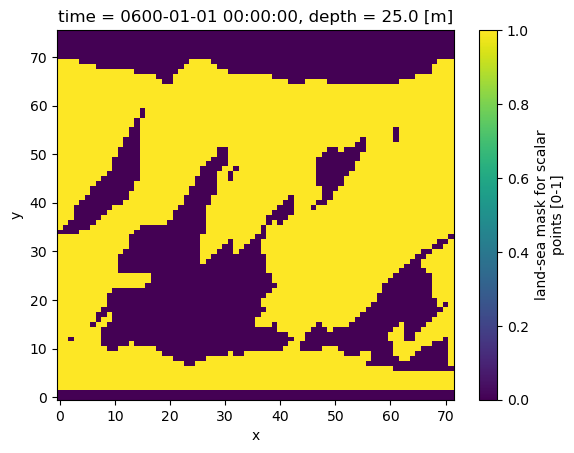

In [13]:
lsm = data1.wet[0,0,:,:]
lsm.plot()  
#data1.wet.isel(depth=10, time=0)

In [14]:
data1.zeta.lon[0,:].values #plotting lon and lat for zeta that is the height from sea surface

array([  2.5,   7.5,  12.5,  17.5,  22.5,  27.5,  32.5,  37.5,  42.5,
        47.5,  52.5,  57.5,  62.5,  67.5,  72.5,  77.5,  82.5,  87.5,
        92.5,  97.5, 102.5, 107.5, 112.5, 117.5, 122.5, 127.5, 132.5,
       137.5, 142.5, 147.5, 152.5, 157.5, 162.5, 167.5, 172.5, 177.5,
       182.5, 187.5, 192.5, 197.5, 202.5, 207.5, 212.5, 217.5, 222.5,
       227.5, 232.5, 237.5, 242.5, 247.5, 252.5, 257.5, 262.5, 267.5,
       272.5, 277.5, 282.5, 287.5, 292.5, 297.5, 302.5, 307.5, 312.5,
       317.5, 322.5, 327.5, 332.5, 337.5, 342.5, 347.5, 352.5, 357.5])

In [15]:
weights = xr.open_dataset("/work/users/ighirardo/plasim/exp/weights_and_wet/weights_lsg_nn_144x72.nc")
weights

<xarray.Dataset>
Dimensions:              (src_grid_rank: 2, dst_grid_rank: 2,
                          src_grid_size: 5472, dst_grid_size: 10368,
                          num_links: 6894, num_wgts: 1)
Dimensions without coordinates: src_grid_rank, dst_grid_rank, src_grid_size,
                                dst_grid_size, num_links, num_wgts
Data variables: (12/13)
    src_grid_dims        (src_grid_rank) int32 ...
    dst_grid_dims        (dst_grid_rank) int32 ...
    src_grid_center_lat  (src_grid_size) float64 ...
    dst_grid_center_lat  (dst_grid_size) float64 ...
    src_grid_center_lon  (src_grid_size) float64 ...
    dst_grid_center_lon  (dst_grid_size) float64 ...
    ...                   ...
    dst_grid_imask       (dst_grid_size) int32 ...
    src_grid_frac        (src_grid_size) float64 ...
    dst_grid_frac        (dst_grid_size) float64 ...
    src_address          (num_links) int32 ...
    dst_address          (num_links) int32 ...
    remap_matrix         (num_links, num_wgts) float64 ...
Attributes:
    title:          CDO remapping
    normalization:  none
    map_method:     Nearest neighbor
    conventions:    SCRIP
    source_grid:    curvilinear
    dest_grid:      lonlat
    history:        07 Oct 2024 : cdo gennn,grid144x72.txt wet_miss.nc weight...
    CDO:            Climate Data Operators version 2.0.4 (https://mpimet.mpg....

In [16]:
regridder = Regridder(weights=weights)

In [9]:
# regridder = Regridder(source_grid=lsm, target_grid="r144x144", method="nn") #farlo da mafalda

In [17]:
t0 = data1.t.isel(depth=0)

In [18]:
t0

<xarray.DataArray 't' (time: 12, y: 76, x: 72)>
dask.array<getitem, shape=(12, 76, 72), dtype=float32, chunksize=(12, 76, 72), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0600-01-01 00:00:00 ... 0600-12-01 00:00:00
    lon      (y, x) float64 dask.array<chunksize=(76, 72), meta=np.ndarray>
    lat      (y, x) float64 dask.array<chunksize=(76, 72), meta=np.ndarray>
    lon_2    (y, x) float64 dask.array<chunksize=(76, 72), meta=np.ndarray>
    lat_2    (y, x) float64 dask.array<chunksize=(76, 72), meta=np.ndarray>
    depth    float64 25.0
Dimensions without coordinates: y, x
Attributes:
    long_name:  potential temperature
    units:      K
    code:       2

In [19]:
t0r = regridder.regrid(t0)

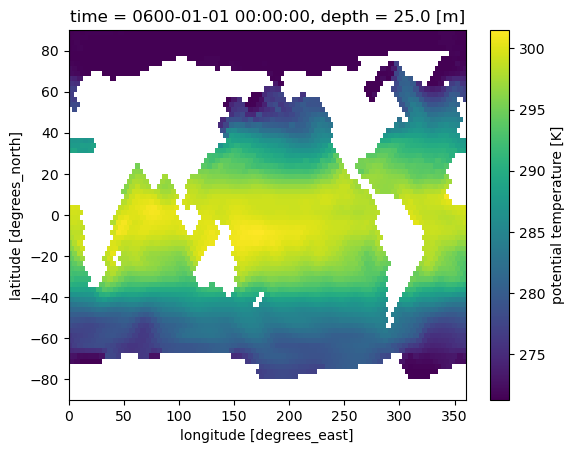

In [20]:
t0r.isel(time=0).plot()

In [14]:
t0r[:,0].lon.values

array([  1.25,   3.75,   6.25,   8.75,  11.25,  13.75,  16.25,  18.75,
        21.25,  23.75,  26.25,  28.75,  31.25,  33.75,  36.25,  38.75,
        41.25,  43.75,  46.25,  48.75,  51.25,  53.75,  56.25,  58.75,
        61.25,  63.75,  66.25,  68.75,  71.25,  73.75,  76.25,  78.75,
        81.25,  83.75,  86.25,  88.75,  91.25,  93.75,  96.25,  98.75,
       101.25, 103.75, 106.25, 108.75, 111.25, 113.75, 116.25, 118.75,
       121.25, 123.75, 126.25, 128.75, 131.25, 133.75, 136.25, 138.75,
       141.25, 143.75, 146.25, 148.75, 151.25, 153.75, 156.25, 158.75,
       161.25, 163.75, 166.25, 168.75, 171.25, 173.75, 176.25, 178.75,
       181.25, 183.75, 186.25, 188.75, 191.25, 193.75, 196.25, 198.75,
       201.25, 203.75, 206.25, 208.75, 211.25, 213.75, 216.25, 218.75,
       221.25, 223.75, 226.25, 228.75, 231.25, 233.75, 236.25, 238.75,
       241.25, 243.75, 246.25, 248.75, 251.25, 253.75, 256.25, 258.75,
       261.25, 263.75, 266.25, 268.75, 271.25, 273.75, 276.25, 278.75,
      

TO OBSERVE OCEAN DEPTH IN T EVALUATIONS

In [15]:
data1.t.sel(depth=slice(700,2000)) #generical interval took from heat content paper

<xarray.DataArray 't' (time: 12, depth: 7, y: 76, x: 72)>
dask.array<getitem, shape=(12, 7, 76, 72), dtype=float32, chunksize=(12, 7, 76, 72), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0202-03-01 00:00:00 ... 0203-02-01 00:00:00
    lon      (y, x) float64 dask.array<chunksize=(76, 72), meta=np.ndarray>
    lat      (y, x) float64 dask.array<chunksize=(76, 72), meta=np.ndarray>
  * depth    (depth) float64 750.0 850.0 950.0 1.1e+03 1.3e+03 1.5e+03 1.8e+03
Dimensions without coordinates: y, x
Attributes:
    long_name:  potential temperature
    units:      K
    code:       2

400 meters is subsurface T, 2000 is deep ocean 

TEMPERATURE 3D

In [16]:
#import numpy as np
#tas = np.array([t1, t2, t3])
#strates = np.array([s1, s2, s3])
#tas_eq = np.sum(tas * strates) / np.sum(strates)

In [17]:
import cdo

#cdo.gridarea() is not working so I have to multiplied the remapped area t0r with the depth of the layer of interest

We can use the heat content to check when ocean T reaches equilibrium but also the TOA balance that will reach it faster than the ocean

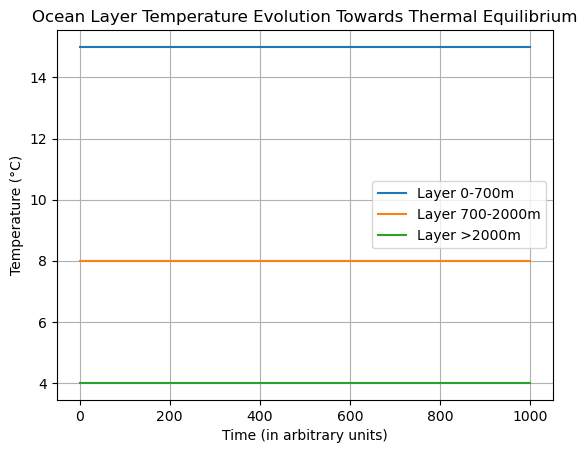

In [18]:
import numpy as np
import matplotlib.pyplot as plt

c = 4184  # Specific heat capacity of water (J/kg°C)
total_mass_ocean = 1.4e21  # Total mass of the ocean (in kg)

# Define three ocean layers: 0-700m, 700-2000m, and below 2000m FROM PAPER

layer_depths = [700, 1300, 3000]  # Depth ranges (in meters)
layer_masses = [total_mass_ocean * depth / sum(layer_depths) for depth in layer_depths]  # Mass of each layer
initial_temps = [15, 8, 4]  # Initial temperatures for each layer (in degrees Celsius)
air_temp = 20  # Air temperature (in degrees Celsius)
heat_transfer_coeff_air = 100  # Heat transfer coefficient between air and top layer
heat_transfer_coeff_layers = 50  # Heat transfer coefficient between ocean layers (hypothetical)

# Function to calculate heat transfer
def calculate_heat(mass, heat_capacity, delta_T):
    return mass * heat_capacity * delta_T

# Function to model heat transfer between layers and air
def model_layers(temp_layers, temp_air, layer_masses, c, heat_coeff_air, heat_coeff_layers, time_steps=1000, dt=1):
    temperatures = [temp_layers.copy()]  # List to store temperature evolution
    num_layers = len(temp_layers)
    
    for _ in range(time_steps):
        temp_layers_new = temp_layers.copy()

        # Heat exchange between top layer and air
        dQ_air = heat_coeff_air * (temp_air - temp_layers[0]) * dt
        delta_T_top_layer = dQ_air / (layer_masses[0] * c)
        temp_layers_new[0] += delta_T_top_layer

        # Heat exchange between adjacent ocean layers
        for i in range(1, num_layers):
            dQ_layers = heat_coeff_layers * (temp_layers[i-1] - temp_layers[i]) * dt
            delta_T_current_layer = dQ_layers / (layer_masses[i] * c)
            delta_T_previous_layer = -dQ_layers / (layer_masses[i-1] * c)
            temp_layers_new[i] += delta_T_current_layer
            temp_layers_new[i-1] += delta_T_previous_layer

        # Update temperatures
        temp_layers = temp_layers_new
        temperatures.append(temp_layers.copy())

        # Stop if layers are near equilibrium (within a small tolerance)
        if max(abs(temp_air - temp_layers[0]), *[abs(temp_layers[i] - temp_layers[i-1]) for i in range(1, num_layers)]) < 0.001:
            break

    return temperatures


layer_temperatures = initial_temps.copy()

temperature_evolution = model_layers(layer_temperatures, air_temp, layer_masses, c, heat_transfer_coeff_air, heat_transfer_coeff_layers)

time_steps = len(temperature_evolution)
time = np.arange(time_steps)


for i, depth_range in enumerate(["0-700m", "700-2000m", ">2000m"]):
    temperatures = [temp[i] for temp in temperature_evolution]
    plt.plot(time, temperatures, label=f"Layer {depth_range}")

plt.xlabel("Time (in arbitrary units)")
plt.ylabel("Temperature (°C)")
plt.title("Ocean Layer Temperature Evolution Towards Thermal Equilibrium")
plt.legend()
plt.grid(True)
plt.show()